In [147]:
import pandas as pd
import zipfile
from datetime import date
import datetime
import calendar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random

In [7]:
archive = zipfile.ZipFile('./input/Данные.zip', 'r')

orders = pd.read_csv(archive.open("orders.csv"))
delays = pd.read_csv(archive.open("partners_delays.csv"))

In [21]:
orders = orders.rename(columns = {"date": "dttm"})

In [27]:
orders, delays

(        delivery_area_id                 dttm  orders_cnt
 0                      0  2021-04-01 10:00:00           9
 1                      0  2021-04-01 11:00:00           1
 2                      0  2021-04-01 13:00:00           1
 3                      0  2021-04-01 14:00:00           1
 4                      0  2021-04-01 15:00:00           2
 ...                  ...                  ...         ...
 884851               592  2021-11-30 16:00:00           6
 884852               592  2021-11-30 17:00:00           3
 884853               592  2021-11-30 18:00:00           2
 884854               592  2021-11-30 19:00:00           4
 884855               592  2021-11-30 20:00:00           4
 
 [884856 rows x 3 columns],
          delivery_area_id                 dttm  partners_cnt  delay_rate
 0                       0  2021-04-01 09:00:00           3.0    0.000000
 1                       0  2021-04-01 10:00:00           4.0    0.111111
 2                       0  2021-04-01 1

In [26]:
orders.isna().sum(), delays.isna().sum()

(delivery_area_id    0
 dttm                0
 orders_cnt          0
 dtype: int64,
 delivery_area_id    0
 dttm                0
 partners_cnt        0
 delay_rate          0
 dtype: int64)

In [22]:
df = pd.merge(orders, delays, how = "outer", on = ['dttm', "delivery_area_id"])

In [25]:
df.isna().sum()

delivery_area_id         0
dttm                     0
orders_cnt          362615
partners_cnt             0
delay_rate               0
dtype: int64

In [28]:
df["dttm"] = pd.to_datetime(df["dttm"])

In [33]:
def get_weekday(row):
    return calendar.day_name[row['dttm'].weekday()]

In [34]:
df["weekday"] = df.apply(lambda row: get_weekday(row), axis = 1)

In [35]:
df

,delivery_area_id,dttm,orders_cnt,partners_cnt,delay_rate,weekday
0,0,2021-04-01 10:00:00,9.0,4.0,0.111111,Thursday
1,0,2021-04-01 11:00:00,1.0,4.0,0.000000,Thursday
2,0,2021-04-01 13:00:00,1.0,1.0,0.000000,Thursday
3,0,2021-04-01 14:00:00,1.0,1.0,0.000000,Thursday
4,0,2021-04-01 15:00:00,2.0,1.0,0.000000,Thursday
...,...,...,...,...,...,...
1247466,592,2021-11-23 21:00:00,NaN,1.0,0.000000,Tuesday
1247467,592,2021-11-25 20:00:00,NaN,1.0,0.000000,Thursday
1247468,592,2021-11-25 21:00:00,NaN,1.0,0.000000,Thursday
1247469,592,2021-11-26 19:00:00,NaN,2.0,0.000000,Friday


In [36]:
df.to_csv("./proceeded/united_with_weekdays.csv")

# Analysis

In [ ]:
df.read_csv("./proceeded/united_with_weekdays.csv")

In [37]:
df['dates'] = pd.to_datetime(df['dttm']).dt.date
df['time'] = pd.to_datetime(df['dttm']).dt.time

In [53]:
df

,delivery_area_id,dttm,orders_cnt,partners_cnt,delay_rate,weekday,dates,time
0,0,2021-04-01 10:00:00,9.0,4.0,0.111111,Thursday,2021-04-01,10:00:00
1,0,2021-04-01 11:00:00,1.0,4.0,0.000000,Thursday,2021-04-01,11:00:00
2,0,2021-04-01 13:00:00,1.0,1.0,0.000000,Thursday,2021-04-01,13:00:00
3,0,2021-04-01 14:00:00,1.0,1.0,0.000000,Thursday,2021-04-01,14:00:00
4,0,2021-04-01 15:00:00,2.0,1.0,0.000000,Thursday,2021-04-01,15:00:00
...,...,...,...,...,...,...,...,...
1247466,592,2021-11-23 21:00:00,NaN,1.0,0.000000,Tuesday,2021-11-23,21:00:00
1247467,592,2021-11-25 20:00:00,NaN,1.0,0.000000,Thursday,2021-11-25,20:00:00
1247468,592,2021-11-25 21:00:00,NaN,1.0,0.000000,Thursday,2021-11-25,21:00:00
1247469,592,2021-11-26 19:00:00,NaN,2.0,0.000000,Friday,2021-11-26,19:00:00


In [54]:
df = df.dropna()

In [55]:
df_bydays = df.groupby(by = ["dates"]).sum().drop(labels = ["delivery_area_id", "delay_rate"], axis = 1).reset_index()

In [56]:
df_bydays

,dates,orders_cnt,partners_cnt
0,2021-04-01,1280.0,954.0
1,2021-04-02,1192.0,893.0
2,2021-04-03,1269.0,857.0
3,2021-04-04,1261.0,930.0
4,2021-04-05,1928.0,1254.0
...,...,...,...
239,2021-11-26,34853.0,21133.0
240,2021-11-27,40550.0,21656.0
241,2021-11-28,40440.0,21091.0
242,2021-11-29,33392.0,20034.0


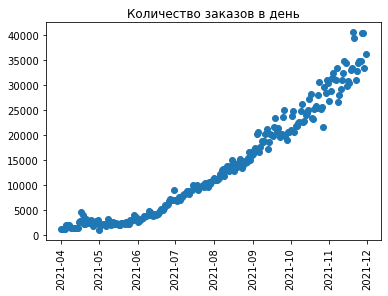

In [63]:
plt.scatter(df_bydays.dates, df_bydays.orders_cnt)
plt.title("Количество заказов в день")
plt.tick_params(axis='x', labelrotation=90)
plt.show()

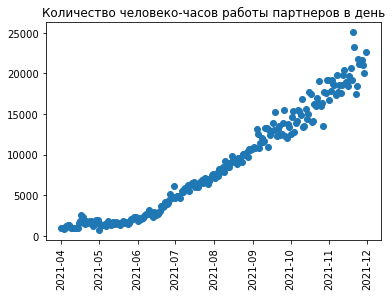

In [64]:
plt.scatter(df_bydays.dates, df_bydays.partners_cnt)
plt.title("Количество человеко-часов работы партнеров в день")
plt.tick_params(axis='x', labelrotation=90)
plt.show()

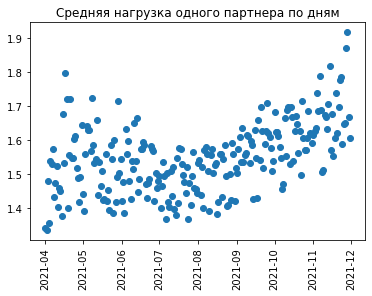

In [66]:
plt.scatter(df_bydays.dates, df_bydays.orders_cnt / df_bydays.partners_cnt)
plt.title("Средняя нагрузка одного партнера по дням")
plt.tick_params(axis='x', labelrotation=90)
plt.show()

In [158]:
df

,delivery_area_id,dttm,orders_cnt,partners_cnt,delay_rate,weekday,dates,time
0,0,2021-04-01 10:00:00,9.0,4.0,0.111111,Thursday,2021-04-01,10:00:00
1,0,2021-04-01 11:00:00,1.0,4.0,0.000000,Thursday,2021-04-01,11:00:00
2,0,2021-04-01 13:00:00,1.0,1.0,0.000000,Thursday,2021-04-01,13:00:00
3,0,2021-04-01 14:00:00,1.0,1.0,0.000000,Thursday,2021-04-01,14:00:00
4,0,2021-04-01 15:00:00,2.0,1.0,0.000000,Thursday,2021-04-01,15:00:00
...,...,...,...,...,...,...,...,...
884851,592,2021-11-30 16:00:00,6.0,3.0,0.000000,Tuesday,2021-11-30,16:00:00
884852,592,2021-11-30 17:00:00,3.0,2.0,0.000000,Tuesday,2021-11-30,17:00:00
884853,592,2021-11-30 18:00:00,2.0,2.0,0.000000,Tuesday,2021-11-30,18:00:00
884854,592,2021-11-30 19:00:00,4.0,2.0,0.000000,Tuesday,2021-11-30,19:00:00


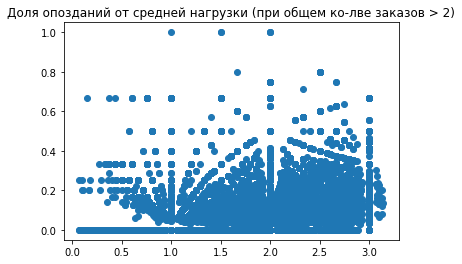

In [161]:
help_df = df.loc[df["orders_cnt"] > 2]

plt.scatter(help_df.orders_cnt / help_df.partners_cnt, help_df.delay_rate)
plt.title("Доля опозданий от средней нагрузки (при общем кол-ве заказов > 2)")
plt.show()

### Рассмотрим динамику заказов по дням в каком-то отдельном регионе

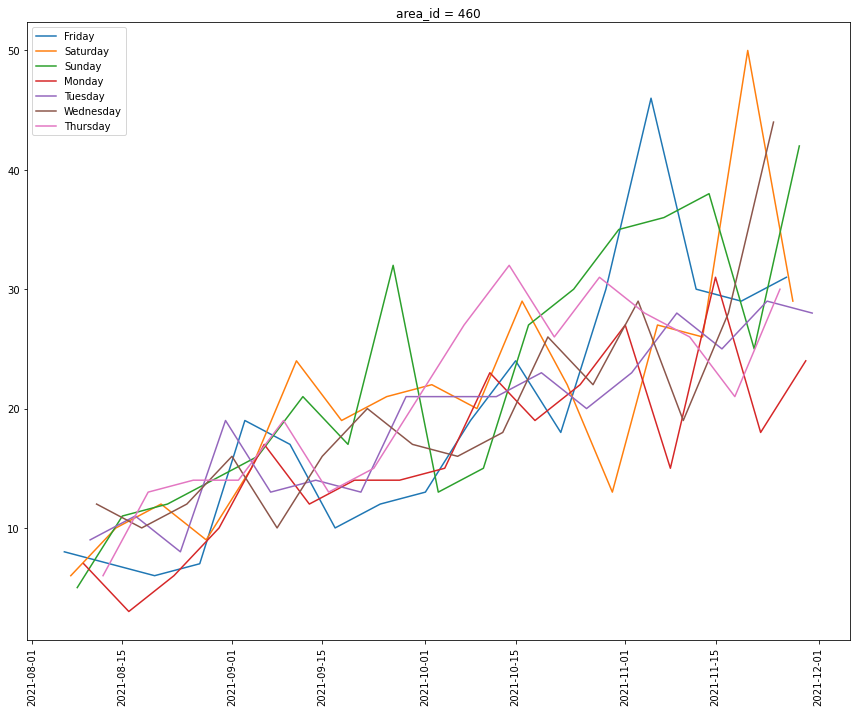

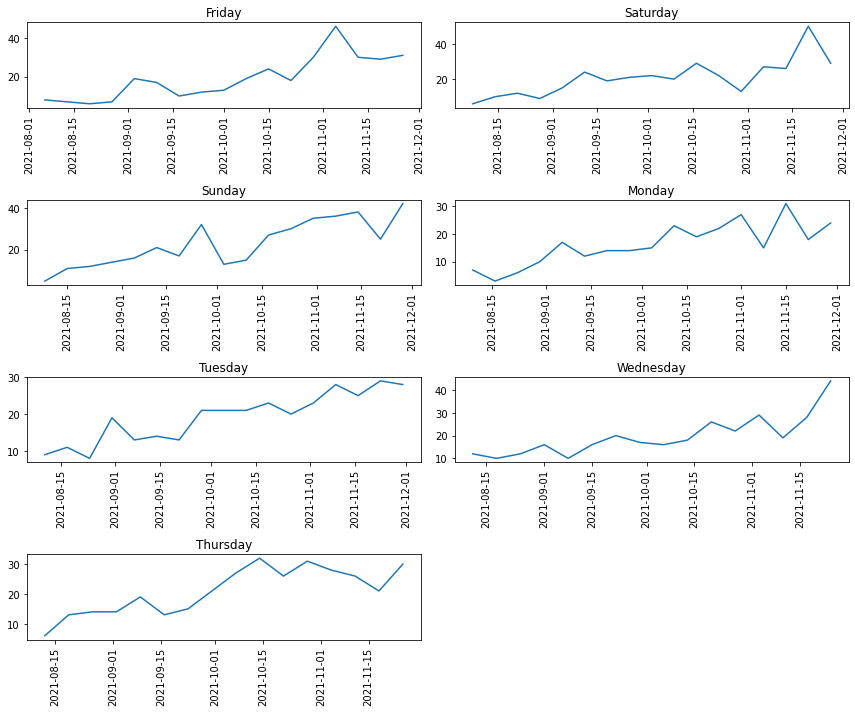

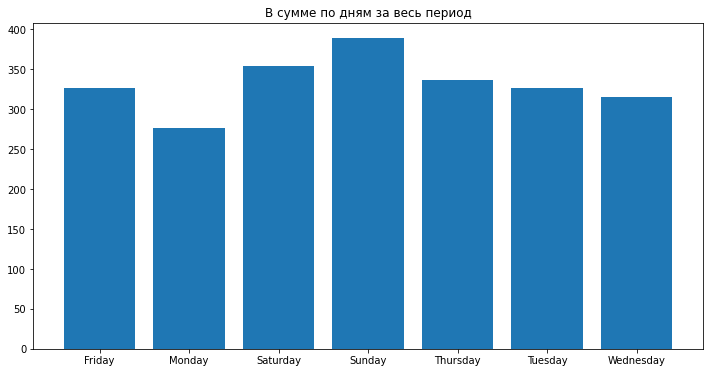

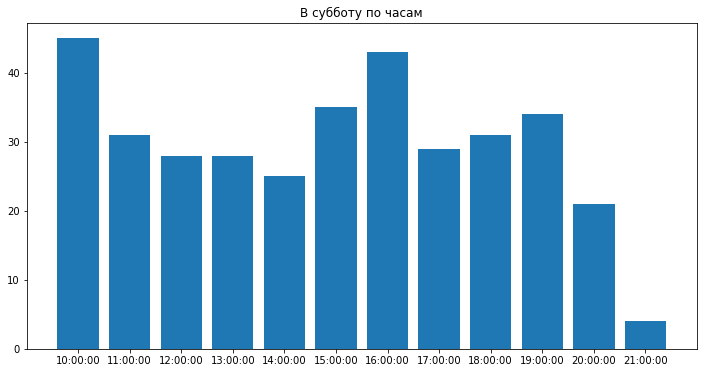

In [151]:
rndm_area_id = random.randint(0, 592)

df_one_area = df.loc[df["delivery_area_id"] == rndm_area_id]
df_one_area.reset_index(drop = True, inplace = True)
df_one_area_saturday = df_one_area.loc[df_one_area['weekday'] == "Saturday"]
df_one_area_saturday = df_one_area_saturday.groupby(by = ["weekday", "time", "delivery_area_id"]).sum().reset_index()
df_one_area = df_one_area.groupby(by = ["dates", "weekday", "delivery_area_id"]).sum().reset_index()



plt.figure(figsize=(12, 10))
plt.title("area_id = "+str(rndm_area_id))
for i, wd in enumerate(df_one_area.weekday.unique()):

    help_df = df_one_area.loc[df_one_area["weekday"] == wd]
    plt.plot(help_df.dates, help_df.orders_cnt, label = str(wd))
    plt.tick_params(axis='x', labelrotation=90)
    
plt.legend()    
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 10))
plt.title("area_id = "+str(rndm_area_id))
for i, wd in enumerate(df_one_area.weekday.unique()):
    plt.subplot(4,2,i+1)
    plt.title(wd)
    help_df = df_one_area.loc[df_one_area["weekday"] == wd]
    plt.plot(help_df.dates, help_df.orders_cnt, label = str(wd))
    plt.tick_params(axis='x', labelrotation=90)
     
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.title("В сумме по дням за весь период")
help_df = df_one_area.groupby(by = ["weekday"]).sum().reset_index()

plt.bar(help_df.weekday, help_df.orders_cnt)
plt.show()

plt.figure(figsize=(12, 6))
plt.title("В субботу по часам")
plt.bar(df_one_area_saturday.time.astype("string"), df_one_area_saturday.orders_cnt)
plt.show()

In [152]:
df

,delivery_area_id,dttm,orders_cnt,partners_cnt,delay_rate,weekday,dates,time
0,0,2021-04-01 10:00:00,9.0,4.0,0.111111,Thursday,2021-04-01,10:00:00
1,0,2021-04-01 11:00:00,1.0,4.0,0.000000,Thursday,2021-04-01,11:00:00
2,0,2021-04-01 13:00:00,1.0,1.0,0.000000,Thursday,2021-04-01,13:00:00
3,0,2021-04-01 14:00:00,1.0,1.0,0.000000,Thursday,2021-04-01,14:00:00
4,0,2021-04-01 15:00:00,2.0,1.0,0.000000,Thursday,2021-04-01,15:00:00
...,...,...,...,...,...,...,...,...
884851,592,2021-11-30 16:00:00,6.0,3.0,0.000000,Tuesday,2021-11-30,16:00:00
884852,592,2021-11-30 17:00:00,3.0,2.0,0.000000,Tuesday,2021-11-30,17:00:00
884853,592,2021-11-30 18:00:00,2.0,2.0,0.000000,Tuesday,2021-11-30,18:00:00
884854,592,2021-11-30 19:00:00,4.0,2.0,0.000000,Tuesday,2021-11-30,19:00:00
